# NYC Property Sales

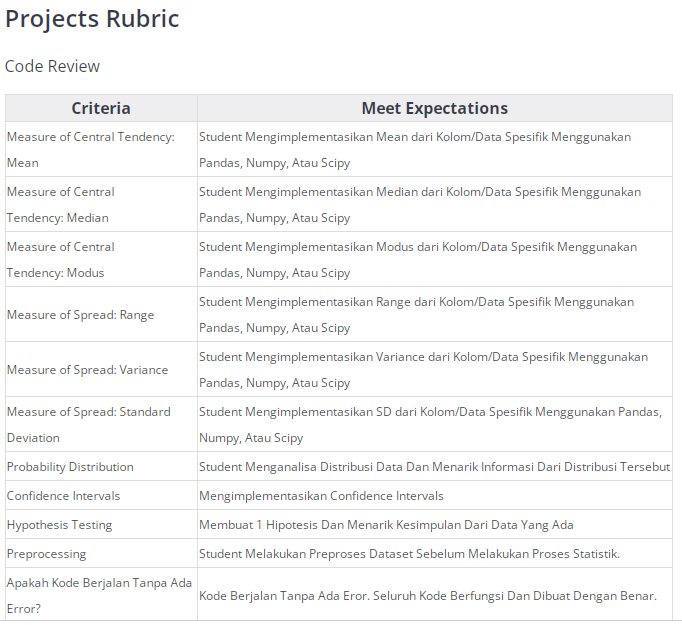

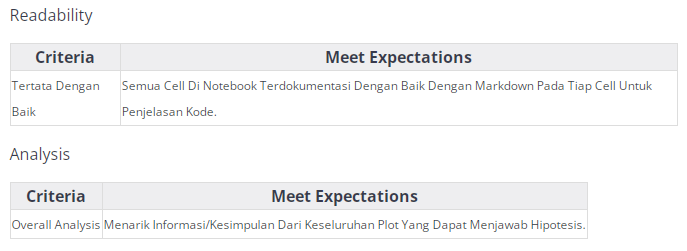

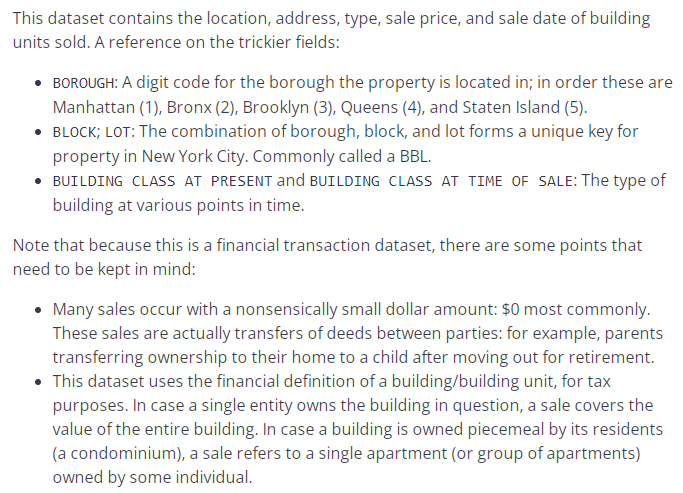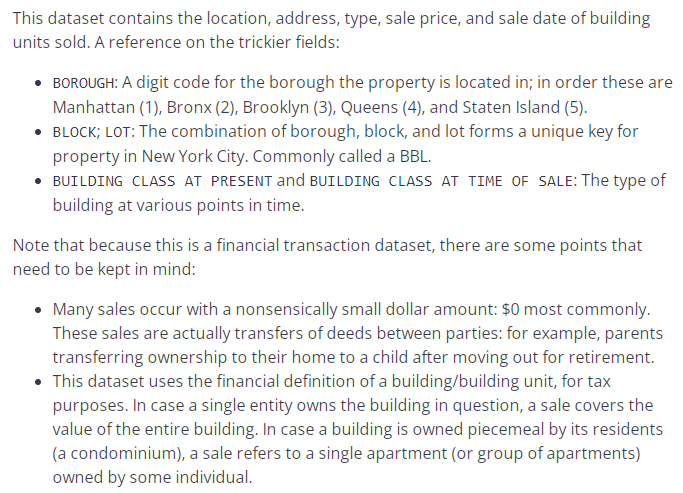

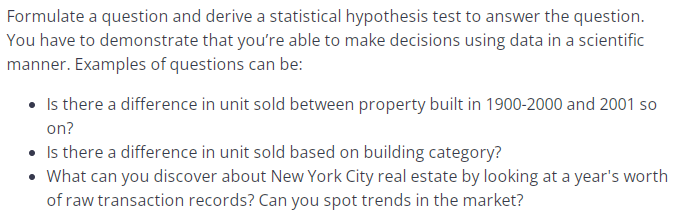

In [230]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

In [231]:
nyc_rs = pd.read_csv('nyc-rolling-sales.csv')
pd.set_option('display.max_columns', None)

In [232]:
nyc_rs.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [233]:
nyc_rs.isna().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [347]:
nyc_rs['BOROUGH'] = nyc_rs['BOROUGH'].astype(str)
nyc_rs['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
nyc_rs['SALE DATE'] = nyc_rs['SALE DATE'].astype('datetime64[ns]')
nyc_rs['SALE MONTH']= nyc_rs['SALE DATE'].dt.month_name()
nyc_rs['SALE YEAR']= nyc_rs['SALE DATE'].dt.year
nyc_rs.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,sale_month,sale_year,SALE MONTH,SALE YEAR
SALE DATE,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-19,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,July,2017,July,2017
2016-12-14,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,December,2016,December,2016
2016-12-09,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,December,2016,December,2016
2016-09-23,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,September,2016,September,2016
2016-11-17,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,November,2016,November,2016


In [371]:
nyc_SD = nyc_rs.groupby(['SALE DATE']).sum()
nyc_SD_B = nyc_rs.groupby(['SALE YEAR','SALE MONTH','BOROUGH']).sum()
nyc_SD_N = nyc_rs.groupby(['SALE YEAR','SALE MONTH','NEIGHBORHOOD']).sum() 
nyc_SD_BCC = nyc_rs.groupby(['SALE YEAR','SALE MONTH','BUILDING CLASS CATEGORY']).sum() 
nyc_SD_YB = nyc_rs.groupby(['SALE YEAR','SALE MONTH','YEAR BUILT']).sum() 


C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_6064\1769827895.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nyc_SD = nyc_rs.groupby(['SALE DATE']).sum()
C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_6064\1769827895.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nyc_SD_B = nyc_rs.groupby(['SALE YEAR','SALE MONTH','BOROUGH']).sum()
C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_6064\1769827895.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns 

In [357]:
nyc_SD

Unnamed: 0     BLOCK      LOT  ZIP CODE  \
SALE YEAR SALE MONTH                                            
2016      December      81745663  33215320  3013175  85055765   
          November      72207296  30843472  2414729  76410358   
          October       69181456  29782435  2386577  72596525   
          September     79605410  32362739  2855717  83927584   
2017      April         64690818  27679380  2508566  68885140   
          August        61916245  23259876  2335388  60964387   
          February      64866490  27248644  2234588  68211229   
          January       69811307  28066053  2608099  73947639   
          July          65781014  26571794  2486741  67277349   
          June          85703780  33936741  3394717  87360852   
          March         80218491  32771581  2827921  82984183   
          May           78866969  32510355  2742770  79747416   

                      RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
SALE YEAR SALE MONTH                                                     
2016      December                19255              1507        21045   
          November                15459              1962        17673   
          October                 12923              2955        16068   
          September               18109              2146        20549   
2017      April                   12120               721        13036   
          August                   9021               625         9764   
          February                10924               957        12033   
          January                 11399              1642        13291   
          July                    14062               817        15038   
          June                    18677               906        19784   
          March                   12551              1458        14300   
          May                     16732               669        17583   

                      YEAR BUILT  TAX CLASS AT TIME OF SALE  sale_year  
SALE YEAR SALE MONTH                                                    
2016      December      14122421                      13275   15908256  
          November      12788049                      11688   14257152  
          October       12034747                      11036   13610016  
          September     14069847                      13235   15682464  
2017      April         11479553                      10388   12912834  
          August         9924656                       9690   11458577  
          February      11502496                      10213   12753491  
          January       12409471                      11389   13858807  
          July          11055305                      10444   12745423  
          June          14716702                      13881   16726981  
          March         13792474                      12636   15540985  
          May           13387958                      12262   15048837

In [358]:
nyc_SD_B

Unnamed: 0     BLOCK      LOT  ZIP CODE  \
SALE YEAR SALE MONTH BOROUGH                                                  
2016      December   Bronx             2402142   2750677   192054   6759810   
                     Brooklyn         27469007   9825913   851557  25806839   
                     Manhattan        15285653   1965356  1280409  16860678   
                     Queens           33364882  16187089   533875  27979977   
                     Staten Island     3223979   2486285   155280   7648461   
          November   Bronx             2020441   2407787   170152   5943729   
                     Brooklyn         23965538   9156576   620478  22521090   
                     Manhattan        11850150   1470924   963261  13239373   
                     Queens           31192600  15244735   535791  27088420   
                     Staten Island     3178567   2563450   125047   7617746   
          October    Bronx             2071585   2441970   145260   5776860   
                     Brooklyn         21164808   8270582   596319  20466560   
                     Manhattan        12574753   1537999  1070505  14247121   
                     Queens           30448809  15234890   435886  25096509   
                     Staten Island     2921501   2296994   138607   7009475   
          September  Bronx             2157363   2692857   169060   6728232   
                     Brooklyn         26645838   9757064   706887  25110849   
                     Manhattan        16043793   1875544  1299158  17260248   
                     Queens           31423778  15487550   540905  26787954   
                     Staten Island     3334638   2549724   139707   8040301   
2017      April      Bronx             2187168   2555272   246025   6372852   
                     Brooklyn         20646224   7632992   600170  19254465   
                     Manhattan        11457976   1436460   943966  13118587   
                     Queens           27562059  13900964   555920  23263811   
                     Staten Island     2837391   2153692   162485   6875425   
          August     Bronx             1543068   1792156   132749   4447115   
                     Brooklyn         20004826   6913934   565143  17807901   
                     Manhattan        15664494   1784540  1176440  15620081   
                     Queens           23529350  11744661   399958  20110169   
                     Staten Island     1174507   1024585    61098   2979121   
          February   Bronx             1885822   2301010   152267   5671556   
                     Brooklyn         22132651   7803752   626656  20677797   
                     Manhattan        11570579   1389928   950530  12877136   
                     Queens           26541895  13770194   383653  22542308   
                     Staten Island     2735543   1983760   121482   6442432   
          January    Bronx             1987454   2333626   144960   5755793   
                     Brooklyn         22312171   8221934   631417  21429608   
                     Manhattan        14609332   1724830  1311433  15896539   
                     Queens           27952411  13535824   407393  23856285   
                     Staten Island     2949939   2249839   112896   7009414   
          July       Bronx             1804065   2200909   166434   5430800   
                     Brooklyn         21562332   7473612   635056  19354507   
                     Manhattan        13057387   1569370  1033489  13723727   
                     Queens           26835548  13317732   542033  22738103   
                     Staten Island     2521682   2010171   109729   6030212   
          June       Bronx             2501880   2988272   213360   7387261   
                     Brooklyn         30085314   9761744   887603  25896732   
                     Manhattan        16701778   2029488  1360198  17492522   
                     Queens           32411751  16057547   650485  27265063   
       

In [359]:
nyc_SD_N

Unnamed: 0   BLOCK    LOT  \
SALE YEAR SALE MONTH NEIGHBORHOOD                                      
2016      December   ALPHABET CITY               3356   10768  27597   
                     ANNADALE                    1579   82195    833   
                     ARDEN HEIGHTS              11217  195525   4475   
                     ARROCHAR                    1025    6182     91   
                     ARROCHAR-SHORE ACRES        2693   14170    240   
...                                               ...     ...    ...   
2017      May        WOODHAVEN                 679043  234082   3265   
                     WOODLAWN                   21103   10170    140   
                     WOODROW                    83511   70780   1415   
                     WOODSIDE                 1139791   56382  10162   
                     WYCKOFF HEIGHTS           240167   32478   1303   

                                           ZIP CODE  RESIDENTIAL UNITS  \
SALE YEAR SALE MONTH NEIGHBORHOOD                                        
2016      December   ALPHABET CITY           270243                 65   
                     ANNADALE                113432                 12   
                     ARDEN HEIGHTS           340296                 35   
                     ARROCHAR                 20610                  5   
                     ARROCHAR-SHORE ACRES     51525                  5   
...                                             ...                ...   
2017      May        WOODHAVEN               296931                 38   
                     WOODLAWN                 31410                  5   
                     WOODROW                 103090                 14   
                     WOODSIDE                489211                 63   
                     WYCKOFF HEIGHTS         112370                 17   

                                           COMMERCIAL UNITS  TOTAL UNITS  \
SALE YEAR SALE MONTH NEIGHBORHOOD                                          
2016      December   ALPHABET CITY                        4           69   
                     ANNADALE                             1           13   
                     ARDEN HEIGHTS                        1           36   
                     ARROCHAR                             0            5   
                     ARROCHAR-SHORE ACRES                 0            5   
...                                                     ...          ...   
2017      May        WOODHAVEN                            6           44   
                     WOODLAWN                             0            5   
                     WOODROW                              0           14   
                     WOODSIDE                             2           66   
                     WYCKOFF HEIGHTS                      1           18   

                                           YEAR BUILT  \
SALE YEAR SALE MONTH NEIGHBORHOOD                       
2016      December   ALPHABET CITY              51674   
                     ANNADALE                   19827   
                     ARDEN HEIGHTS              65586   
                     ARROCHAR                    3896   
                     ARROCHAR-SHORE ACRES        7746   
...                                               ...   
2017      May        WOODHAVEN                  49896   
                     WOODLAWN                    5838   
                     WOODROW                    19891   
                     WOODSIDE                   84138   
                     WYCKOFF HEIGHTS             9637   

                                           TAX CLASS AT TIME OF SALE  \
SALE YEAR SALE MONTH NEIGHBORHOOD                                      
2016      December   ALPHABET CITY                                54   
                     ANNADALE                                     16   
                     ARDEN HEIGHTS                                36   
                     ARROCHAR                       

In [360]:
nyc_SD_BCC

Unnamed: 0  \
SALE YEAR SALE MONTH BUILDING CLASS CATEGORY                                   
2016      December   01 ONE FAMILY DWELLINGS                        17419144   
                     02 TWO FAMILY DWELLINGS                        15634382   
                     03 THREE FAMILY DWELLINGS                       3781663   
                     04 TAX CLASS 1 CONDOS                           1303855   
                     05 TAX CLASS 1 VACANT LAND                      1009234   
...                                                                      ...   
2017      May        45 CONDO HOTELS                                   97614   
                     46 CONDO STORE BUILDINGS                         131861   
                     47 CONDO NON-BUSINESS STORAGE                    436309   
                     48 CONDO TERRACES/GARDENS/CABANAS                 38196   
                     49 CONDO WAREHOUSES/FACTORY/INDUS                 69956   

                                                                     BLOCK  \
SALE YEAR SALE MONTH BUILDING CLASS CATEGORY                                 
2016      December   01 ONE FAMILY DWELLINGS                      10665966   
                     02 TWO FAMILY DWELLINGS                       8375122   
                     03 THREE FAMILY DWELLINGS                     1629993   
                     04 TAX CLASS 1 CONDOS                          864836   
                     05 TAX CLASS 1 VACANT LAND                     719261   
...                                                                    ...   
2017      May        45 CONDO HOTELS                                  5713   
                     46 CONDO STORE BUILDINGS                        29639   
                     47 CONDO NON-BUSINESS STORAGE                   53016   
                     48 CONDO TERRACES/GARDENS/CABANAS                9585   
                     49 CONDO WAREHOUSES/FACTORY/INDUS                6972   

                                                                     LOT  \
SALE YEAR SALE MONTH BUILDING CLASS CATEGORY                               
2016      December   01 ONE FAMILY DWELLINGS                      114467   
                     02 TWO FAMILY DWELLINGS                       78266   
                     03 THREE FAMILY DWELLINGS                     20073   
                     04 TAX CLASS 1 CONDOS                        237763   
                     05 TAX CLASS 1 VACANT LAND                    16912   
...                                                                  ...   
2017      May        45 CONDO HOTELS                                9328   
                     46 CONDO STORE BUILDINGS                      21142   
                     47 CONDO NON-BUSINESS STORAGE                 49125   
                     48 CONDO TERRACES/GARDENS/CABANAS              2264   
                     49 CONDO WAREHOUSES/FACTORY/INDUS              3994   

                                                                  ZIP CODE  \
SALE YEAR SALE MONTH BUILDING CLASS CATEGORY                                 
2016      December   01 ONE FAMILY DWELLINGS                      18209653   
                     02 TWO FAMILY DWELLINGS                      16565510   
                     03 THREE FAMILY DWELLINGS                     4442989   
                     04 TAX CLASS 1 CONDOS                         2029717   
                     05 TAX CLASS 1 VACANT LAND                    1042034   
...                                                                    ...   
2017      May        45 CONDO HOTELS                                 70187   
                     46 CONDO STORE BUILDINGS                       145744   
                     47 CONDO NON-BUSINESS STORAGE                  376845   
                     48 CONDO TERRACES/GARDENS/CABANAS               22434   
                     49 CONDO WAREHOUSES/FACTORY/INDUS               33747   

      

In [361]:
nyc_SD_YB

Unnamed: 0    BLOCK     LOT  ZIP CODE  \
SALE YEAR SALE MONTH YEAR BUILT                                          
2016      December   0              6453899  2034223  688810   6366018   
                     1800             20301     5901    1168     31680   
                     1864               290      745      21     10011   
                     1870              3574      573      54     10011   
                     1871             16757       47      33     11101   
...                                     ...      ...     ...       ...   
2017      May        2012            173230    43553   12101    152772   
                     2013            412149   103045   53986    491047   
                     2014           1078014   443226  172108   1650492   
                     2015           1732779   488534  161474   1682972   
                     2016           1054152   484541   97376   1156324   

                                 RESIDENTIAL UNITS  COMMERCIAL UNITS  \
SALE YEAR SALE MONTH YEAR BUILT                                        
2016      December   0                         617                 3   
                     1800                        1                 0   
                     1864                        0                 0   
                     1870                        0                 0   
                     1871                        2                 0   
...                                            ...               ...   
2017      May        2012                       16                 2   
                     2013                       56                 1   
                     2014                      993                 5   
                     2015                      143                 5   
                     2016                      367                 0   

                                 TOTAL UNITS  TAX CLASS AT TIME OF SALE  \
SALE YEAR SALE MONTH YEAR BUILT                                           
2016      December   0                   701                       1521   
                     1800                  1                          4   
                     1864                  0                          2   
                     1870                  0                          2   
                     1871                  2                          1   
...                                      ...                        ...   
2017      May        2012                 19                         26   
                     2013                 59                         91   
                     2014               1019                        337   
                     2015                172                        311   
                     2016                368                        166   

                                 sale_year  
SALE YEAR SALE MONTH YEAR BUILT             
2016      December   0             1308384  
                     1800             6048  
                     1864             2016  
                     1870             2016  
                     1871             2016  
...                                    ...  
2017      May        2012            28238  
                     2013            92782  
                     2014           308601  
                     2015           308601  
                     2016           215819  

[1541 rows x 9 columns]

## Mean

In [372]:
print('Rata-rata pembelian perhari adalah: ', nyc_SD['TOTAL UNITS'].mean())
print('Perbulan berdasarkan wilayah: ', nyc_SD_B['TOTAL UNITS'].mean())
print('Perbulan berdasarkan lingkungan: ',nyc_SD_N['TOTAL UNITS'].mean())
print('Perbulan berdasarkan kelas kategori properti: ',nyc_SD_BCC['TOTAL UNITS'].mean())
print('Perbulan berdasarkan tahun didirikan bangunan: ',nyc_SD_YB['TOTAL UNITS'].mean())

Rata-rata pembelian perhari adalah:  522.4285714285714
Perbulan berdasarkan wilayah:  3169.4
Perbulan berdasarkan lingkungan:  65.19163524168667
Perbulan berdasarkan kelas kategori properti:  386.5121951219512
Perbulan berdasarkan tahun didirikan bangunan:  123.40298507462687


## Median

In [373]:
print('Nilai median pembelian perhari adalah: ', nyc_SD['TOTAL UNITS'].median())
print('Perbulan berdasarkan wilayah: ', nyc_SD_B['TOTAL UNITS'].median())
print('Perbulan berdasarkan lingkungan: ',nyc_SD_N['TOTAL UNITS'].median())
print('Perbulan berdasarkan kategori kelas properti: ',nyc_SD_BCC['TOTAL UNITS'].median())
print('Perbulan berdasarkan tahun didirikan bangunan: ',nyc_SD_YB['TOTAL UNITS'].median())

Nilai median pembelian perhari adalah:  477.5
Perbulan berdasarkan wilayah:  3352.0
Perbulan berdasarkan lingkungan:  30.0
Perbulan berdasarkan kategori kelas properti:  28.0
Perbulan berdasarkan tahun didirikan bangunan:  29.0


## Modus

In [374]:
mode_SD = scipy.stats.mode(nyc_SD['TOTAL UNITS'])
mode_B = scipy.stats.mode(nyc_SD_B['TOTAL UNITS'])
mode_N = scipy.stats.mode(nyc_SD_N['TOTAL UNITS'])
mode_BCC = scipy.stats.mode(nyc_SD_BCC['TOTAL UNITS'])
mode_YB = scipy.stats.mode(nyc_SD_YB['TOTAL UNITS'])

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_6064\3591193778.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_SD = scipy.stats.mode(nyc_SD['TOTAL UNITS'])
C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_6064\3591193778.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to av

In [375]:
print('Nilai pembelian paling sering perhari adalah : ',mode_SD.mode,', Count: ',mode_SD.count)
print('Perbulan berdasarkan Wilayah: ',mode_B.mode,', Count: ',mode_B.count)
print('Perbulan berdasarkan Lingkungan: ',mode_N.mode,', Count: ',mode_N.count)
print('Perbulan berdasarkan kategori kelas properti: ',mode_BCC.mode,', Count: ',mode_BCC.count)
print('Perbulan berdasarkan tahun didirikan: ',mode_YB.mode,', Count: ',mode_YB.count)

Nilai pembelian paling sering perhari adalah :  [22] , Count:  [6]
Perbulan berdasarkan Wilayah:  [866] , Count:  [2]
Perbulan berdasarkan Lingkungan:  [1] , Count:  [82]
Perbulan berdasarkan kategori kelas properti:  [1] , Count:  [32]
Perbulan berdasarkan tahun didirikan:  [1] , Count:  [77]


## Range

In [376]:
print('Range data pembelian perhari adalah :',np.ptp(nyc_SD['TOTAL UNITS']))
print('Perbulan berdasarkan wilayahnya :',np.ptp(nyc_SD_B['TOTAL UNITS']))
print('Perbulan berdasarkan lingkungannya :',np.ptp(nyc_SD_N['TOTAL UNITS']))
print('Perbulan berdasarkan kategori kelasnya :',np.ptp(nyc_SD_BCC['TOTAL UNITS']))
print('Perbulan berdasarkan tahun didirikannya :',np.ptp(nyc_SD_YB['TOTAL UNITS']))

Range data pembelian perhari adalah : 3340
Perbulan berdasarkan wilayahnya : 7842
Perbulan berdasarkan lingkungannya : 2928
Perbulan berdasarkan kategori kelasnya : 6270
Perbulan berdasarkan tahun didirikannya : 3151


## Variance 

In [377]:
print('Variasi data pembelian perhari adalah :',nyc_SD['TOTAL UNITS'].var())
print('Perbulan berdasarkan wilayahnya :',nyc_SD_B['TOTAL UNITS'].var())
print('Perbulan berdasarkan lingkungannya :',nyc_SD_N['TOTAL UNITS'].var())
print('Perbulan berdasarkan kategori kelasnya :',nyc_SD_BCC['TOTAL UNITS'].var())
print('Perbulan berdasarkan tahun didirikannya :',nyc_SD_YB['TOTAL UNITS'].var())

Variasi data pembelian perhari adalah : 306159.27587563935
Perbulan berdasarkan wilayahnya : 3362393.227118643
Perbulan berdasarkan lingkungannya : 23513.13918926601
Perbulan berdasarkan kategori kelasnya : 754563.5497491445
Perbulan berdasarkan tahun didirikannya : 67267.79788718755


## Standard Deviation

In [378]:
print('Standard Deviasi data pembelian perhari adalah :',nyc_SD['TOTAL UNITS'].std())
print('Perbulan berdasarkan wilayahnya :',nyc_SD_B['TOTAL UNITS'].std())
print('Perbulan berdasarkan lingkungannya :',nyc_SD_N['TOTAL UNITS'].std())
print('Perbulan berdasarkan kategori kelasnya :',nyc_SD_BCC['TOTAL UNITS'].std())
print('Perbulan berdasarkan tahun didirikannya :',nyc_SD_YB['TOTAL UNITS'].std())

Standard Deviasi data pembelian perhari adalah : 553.3166144944857
Perbulan berdasarkan wilayahnya : 1833.6829679960065
Perbulan berdasarkan lingkungannya : 153.33994648905423
Perbulan berdasarkan kategori kelasnya : 868.6561746451495
Perbulan berdasarkan tahun didirikannya : 259.36036298399097


## Probability Distribution

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_6064\4066090054.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(nyc_SD['TOTAL UNITS'],


[]

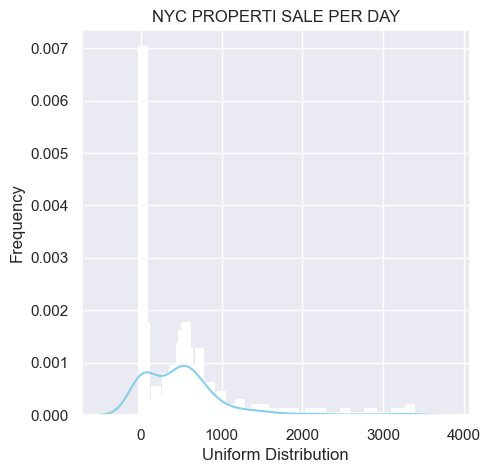

In [379]:
from scipy.stats import uniform

ax = sns.distplot(nyc_SD['TOTAL UNITS'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={'linewidth':5,'alpha':1}
                 )
ax.set(xlabel='Uniform Distribution',
       ylabel='Frequency',
       title='NYC PROPERTI SALE PER DAY'
      )
ax.plot()

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_6064\395215966.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(nyc_SD_B['TOTAL UNITS'],


[]

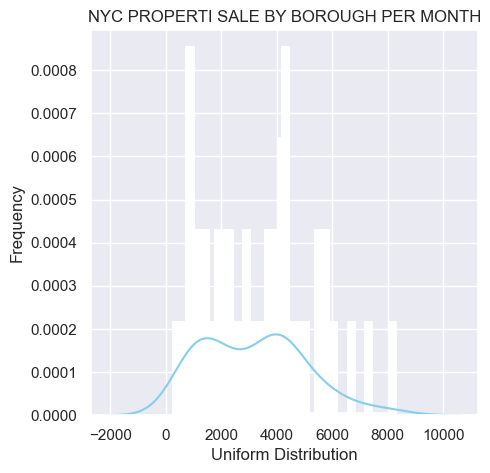

In [380]:
from scipy.stats import uniform

ax = sns.distplot(nyc_SD_B['TOTAL UNITS'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={'linewidth':5,'alpha':1}
                 )
ax.set(xlabel='Uniform Distribution',
       ylabel='Frequency',
       title='NYC PROPERTI SALE BY BOROUGH PER MONTH'
      )
ax.plot()

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_6064\263408554.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(nyc_SD_N['TOTAL UNITS'],


[]

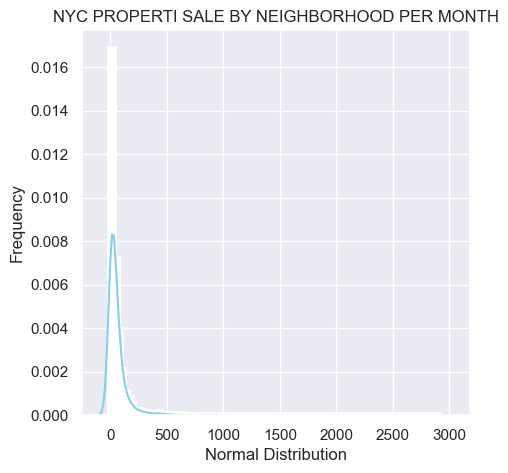

In [381]:
from scipy.stats import norm

ax = sns.distplot(nyc_SD_N['TOTAL UNITS'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={'linewidth':5,'alpha':1}
                 )
ax.set(xlabel='Normal Distribution',
       ylabel='Frequency',
       title='NYC PROPERTI SALE BY NEIGHBORHOOD PER MONTH'
      )
ax.plot()

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_6064\3020452531.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(nyc_SD_BCC['TOTAL UNITS'],


[]

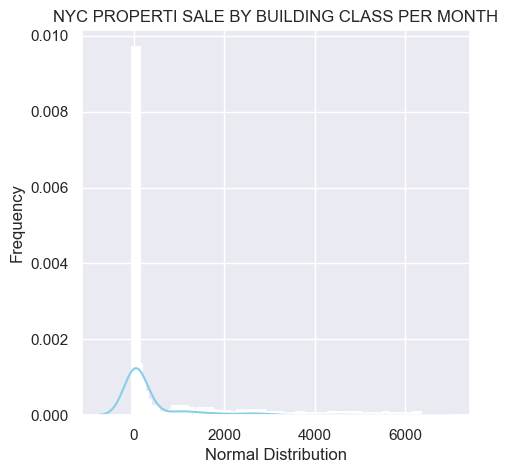

In [382]:
from scipy.stats import norm

ax = sns.distplot(nyc_SD_BCC['TOTAL UNITS'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={'linewidth':5,'alpha':1}
                 )
ax.set(xlabel='Normal Distribution',
       ylabel='Frequency',
       title='NYC PROPERTI SALE BY BUILDING CLASS PER MONTH'
      )
ax.plot()

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_6064\3088515997.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(nyc_SD_YB['TOTAL UNITS'],


[]

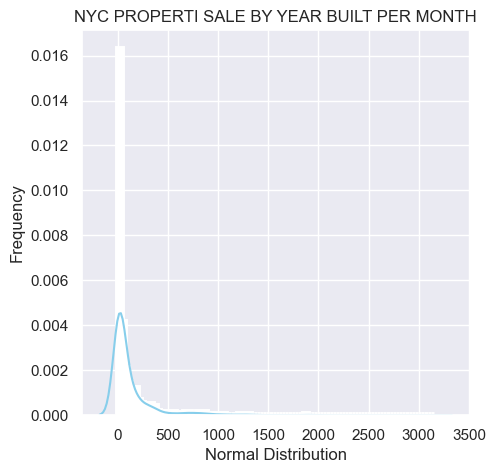

In [383]:
from scipy.stats import norm

ax = sns.distplot(nyc_SD_YB['TOTAL UNITS'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={'linewidth':5,'alpha':1}
                 )
ax.set(xlabel='Normal Distribution',
       ylabel='Frequency',
       title='NYC PROPERTI SALE BY YEAR BUILT PER MONTH'
      )
ax.plot()

## Confidence Intervals

Data NYC Properti Sale memiliki cakupan yang cukup besar, dengan confidence level karena data bukan sampel kecil maka 99.90% sehingga z-scorenya adalah 3.29

Kita akan mencari CI dari Proposi Populasi Pembeli untuk Wilayah Queens

In [440]:
nyc_B = nyc_rs[['BOROUGH','TOTAL UNITS']]
nyc_B.groupby('BOROUGH')['TOTAL UNITS'].sum()

BOROUGH
Bronx            25403
Brooklyn         53400
Manhattan        48504
Queens           51841
Staten Island    11016
Name: TOTAL UNITS, dtype: int64

In [475]:
Brook = nyc_rs[nyc_rs['BOROUGH']=='Brooklyn']['TOTAL UNITS'].sum()
TU = nyc_rs['TOTAL UNITS'].sum()
print('Total Units in Brooklyn:',Brook,', Total Units :', TU)
HC = nyc_rs[nyc_rs['NEIGHBORHOOD']=='HARLEM-CENTRAL']['TOTAL UNITS'].sum()
print('Total Units with HARLEM-CENTRAL:',HC,', Total Units :', TU)

Total Units in Brooklyn: 53400 , Total Units : 190164
Total Units with HARLEM-CENTRAL: 7053 , Total Units : 190164


In [476]:
p_Brook = Brook/TU
p_HC = HC/TU
print('Proporsi pembeli wilayah Brooklyn: ',p_Brook)
print('Proporsi pembeli lingkungan HARLEM-CENTRAL: ',p_HC)


Proporsi pembeli wilayah Brooklyn:  0.2808102479964662
Proporsi pembeli lingkungan HARLEM-CENTRAL:  0.03708903893481416


In [477]:
SE_B = np.sqrt(p_Brook*(1-p_Brook)/TU)
SE_HC = np.sqrt(p_HC*(1-p_HC)/TU)
print('Standart Error Brooklyn:',SE_B)
print('Standart Error HARLEM-CENTRAL:',SE_HC)

Standart Error Brooklyn: 0.001030538140369781
Standart Error HARLEM-CENTRAL: 0.00043336287439195073


In [478]:
z_score = 3.29
L_CI_B = p_Brook - z_score*SE_B
U_CI_B = p_Brook + z_score*SE_B
print('Confidence Interval Brooklyn adalah',L_CI_B,'&', U_CI_B)
L_CI_HC = p_Brook - z_score*SE_HC
U_CI_HC = p_Brook + z_score*SE_HC
print('Confidence Interval Harlem-Central adalah',L_CI_HC,'&', U_CI_HC)

Confidence Interval Brooklyn adalah 0.27741977751464963 & 0.28420071847828277
Confidence Interval Harlem-Central adalah 0.27938448413971667 & 0.28223601185321573


## Hypothesis Testing

In [462]:
nyc_N = nyc_rs[['NEIGHBORHOOD','TOTAL UNITS']]
nyc_N.groupby('NEIGHBORHOOD').sum().sort_values('TOTAL UNITS', ascending=False)

,TOTAL UNITS
NEIGHBORHOOD,
HARLEM-CENTRAL,7053
FLUSHING-NORTH,4540
BEDFORD STUYVESANT,3988
ASTORIA,3830
GLEN OAKS,3806
...,...
EAST RIVER,1
CITY ISLAND-PELHAM STRIP,1
PELHAM BAY,1


Jika saya membuat properti di wilayah Brooklyn dengan lingkungan yang paling banyak disukai (Harlem-Central) maka saya akan meningkatkan total penjualan properti tiap bulannya.

Proporsi memilih wilayah brooklyn adalah sama dengan 28%
Sedangkan proporsi memilih lingkungan Harlem-Central adalah sebesar 3%

In [503]:
nyc_rs[nyc_rs['BOROUGH']=='Brooklyn'].NEIGHBORHOOD.value_counts()

BEDFORD STUYVESANT    1436
BOROUGH PARK          1245
SHEEPSHEAD BAY        1013
EAST NEW YORK          982
FLATBUSH-EAST          846
                      ... 
SPRING CREEK            70
SEAGATE                 67
BUSH TERMINAL           63
NAVY YARD               47
JAMAICA BAY              1
Name: NEIGHBORHOOD, Length: 61, dtype: int64

Dari data lingkungan properti di wilayah Brooklyn tidak terdapat lingkungan Harlem-Central

In [507]:
import statsmodels.api as sm
import scipy.stats.distributions as dist

In [508]:
n = TU
pnull = p_HC
phat = p_Brook

In [509]:
sm.stats.proportions_ztest(phat*n,n,pnull,alternative='larger')

(236.49897030904572, 0.0)

karena nilai p-value dari z-test bernilai 0, berarti kita dapat **reject the Null Hypothesis** bahwa presentase yang membeli properti properti dengan lingkungan Harlem-Central di wilayah Brooklyn akan meningkat.